<h1 style="text-align: center; font-family: Verdana; font-size: 32px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; font-variant: small-caps; letter-spacing: 3px; color: #74d5dd; background-color: #ffffff;">Human Protein Atlas - Single Cell Classification</h1>
<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">Categorical Classification At a Cellular Level [TRAINING]</h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">CREATED BY: DARIEN SCHETTLER</h5>

<br><br>

<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h1>

<br>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#background_information">1&nbsp;&nbsp;&nbsp;&nbsp;BACKGROUND INFORMATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#setup">2&nbsp;&nbsp;&nbsp;&nbsp;SETUP</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">3&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#dataset">4&nbsp;&nbsp;&nbsp;&nbsp;PREPARING THE DATASET - TF.DATA</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#modelling">5&nbsp;&nbsp;&nbsp;&nbsp;MODELLING</a></h3>

---

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [1]:
# Try and get keras plot to work
!pip install -q pydot
!pip install -q pydotplus
!apt-get install -q graphviz

print("\n... OTHER IMPORTS STARTING ...\n")
print("\n\tVERSION INFORMATION")

# Machine Learning and Data Science Imports
import tensorflow_addons as tfa; print(f"\t\t– TENSORFLOW ADDONS VERSION: {tfa.__version__}");
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import scipy; print(f"\t\t– SCIPY VERSION: {scipy.__version__}");

# Built In Imports
from collections import Counter
from datetime import datetime
import multiprocessing
from glob import glob
import warnings
import requests
import imageio
import IPython
import urllib
import zipfile
import pickle
import random
import shutil
import string
import math
import tqdm
import time
import gzip
import io
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib; print(f"\t\t– MATPLOTLIB VERSION: {matplotlib.__version__}");
import plotly
import PIL
import cv2
import ast

# PRESETS
LBL_NAMES = ["Nucleoplasm", "Nuclear Membrane", "Nucleoli", "Nucleoli Fibrillar Center", "Nuclear Speckles", "Nuclear Bodies", "Endoplasmic Reticulum", "Golgi Apparatus", "Intermediate Filaments", "Actin Filaments", "Microtubules", "Mitotic Spindle", "Centrosome", "Plasma Membrane", "Mitochondria", "Aggresome", "Cytosol", "Vesicles", "Negative"]
INT_2_STR = {x:LBL_NAMES[x] for x in np.arange(19)}
INT_2_STR_LOWER = {k:v.lower().replace(" ", "_") for k,v in INT_2_STR.items()}
STR_2_INT_LOWER = {v:k for k,v in INT_2_STR_LOWER.items()}
STR_2_INT = {v:k for k,v in INT_2_STR.items()}
FIG_FONT = dict(family="Helvetica, Arial", size=14, color="#7f7f7f")
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", len(LBL_NAMES))]
LABEL_COL_MAP = {str(i):x for i,x in enumerate(LABEL_COLORS)}

print("\n\n... IMPORTS COMPLETE ...\n")

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

... OTHER IMPORTS STARTING ...


	VERSION INFORMATION
		– TENSORFLOW ADDONS VERSION: 0.12.0
		– TENSORFLOW VERSION: 2.4.0
		– NUMPY VERSION: 1.19.5
		– SCIPY VERSION: 1.4.1
		– MATPLOTLIB VERSION: 3.3.3


... IMPORTS COMPLETE ...



<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="background_information">1&nbsp;&nbsp;BACKGROUND INFORMATION&nbsp;&nbsp;&nbsp;&nbsp; <a href="#toc">&#10514;</a> </h1>

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">1.1 APPROACH OVERVIEW</h3>

---

**TRAINING**

1. Identify slide-level images containing only one label
2. Segment slide-level images (get RLEs for all cells in all applicable slide-level images)
3. Crop RGBY image around each cell
4. Pad each RGBY tile to be square
5. Resize each RGBY tile to be (256px by 256px)
6. **<font color="darkred">Filter the images based on certain additional factors to obtain a better training dataset</font> -- TBD**
7. Seperate the channels and store as seperate datasets
8. Update the dataset (greatly increase the number of negative class examples)
9. Augment the dataset (rotation, flipping (horizontal and vertical), minor-skew)
10. Train a model to classify these tile-level images accurately

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">1.2 VISUAL HELPER</h3>

---



![basic_idea_graph](https://i.ibb.co/y6YfBzN/basic-idea.png)

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="setup">2&nbsp;&nbsp;NOTEBOOK SETUP&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [2]:
# Define the path to the root data directory
ROOT_DIR = "/kaggle/input"

# Define the path to the competition data directory
COMP_DIR = os.path.join(ROOT_DIR, "hpa-single-cell-image-classification")

# Define path to the filtered TP IDs for each class
PKL_DIR = os.path.join(ROOT_DIR, "hpa-rule-based-single-cell-filtering")

# Define the paths to the training tiles for the cell-wise classification dataset
RED_TILE_DIR = os.path.join(ROOT_DIR, "human-protein-atlas-red-cell-tile-dataset")
GREEN_TILE_DIR = os.path.join(ROOT_DIR, "human-protein-atlas-green-cell-tile-dataset")
BLUE_TILE_DIR = os.path.join(ROOT_DIR, "human-protein-atlas-blue-cell-tile-dataset")
YELLOW_TILE_DIR = os.path.join(ROOT_DIR, "human-protein-atlas-yellow-cell-tile-dataset")

# Define the paths to the training and testing tfrecord and 
# image folders respectively for the competition data
TRAIN_IMG_DIR = os.path.join(COMP_DIR, "train")
TRAIN_TFREC_DIR = os.path.join(COMP_DIR, "train_tfrecords")
TEST_IMG_DIR = os.path.join(COMP_DIR, "test")
TEST_TFREC_DIR = os.path.join(COMP_DIR, "test_tfrecords")

# Capture all the relevant full image paths for the competition dataset
TRAIN_IMG_PATHS = sorted([os.path.join(TRAIN_IMG_DIR, f_name) for f_name in os.listdir(TRAIN_IMG_DIR)])
TEST_IMG_PATHS = sorted([os.path.join(TEST_IMG_DIR, f_name) for f_name in os.listdir(TEST_IMG_DIR)])
print(f"\n... Recall that 4 training images compose one example (R,G,B,Y) ...")
print(f"... \t– i.e. The first 4 training files are:")
for path in [x.rsplit('/',1)[1] for x in TRAIN_IMG_PATHS[:4]]: print(f"... \t\t– {path}")
print(f"\n... The number of training images is {len(TRAIN_IMG_PATHS)} i.e. {len(TRAIN_IMG_PATHS)//4} 4-channel images ...")
print(f"... The number of testing images is {len(TEST_IMG_PATHS)} i.e. {len(TEST_IMG_PATHS)//4} 4-channel images ...")

# Capture all the relevant full tfrec paths
TRAIN_TFREC_PATHS = sorted([os.path.join(TRAIN_TFREC_DIR, f_name) for f_name in os.listdir(TRAIN_TFREC_DIR)])
TEST_TFREC_PATHS = sorted([os.path.join(TEST_TFREC_DIR, f_name) for f_name in os.listdir(TEST_TFREC_DIR)])
print(f"\n... The number of training tfrecord files is {len(TRAIN_TFREC_PATHS)} ...")
print(f"... The number of testing tfrecord files is {len(TEST_TFREC_PATHS)} ...\n")

# Random Useful Info
ORIGINAL_DIST_MAP = {0: 37472, 1: 4845, 2: 12672, 3: 12882, 4: 17527, 5: 15337, 6: 10198, 7: 18825, 8: 11194, 9: 5322, 10: 7789, 11: 10, 12: 13952, 13: 21168, 14: 27494, 15: 2275, 16: 22738, 17: 5619, 18: 952}

# Define paths to the relevant csv files
TRAIN_CSV = os.path.join(ROOT_DIR, "hpa-train-data-with-additional-metadata/updated_train.csv")

print("\n... Loading massive train dataframe ...\n")
# Create the relevant dataframe objects
train_df = pd.read_csv(TRAIN_CSV)
# train_df.mask_rles = train_df.mask_rles.apply(lambda x: ast.literal_eval(x))
# train_df.mask_bboxes = train_df.mask_bboxes.apply(lambda x: ast.literal_eval(x))
    
print("\n\nTRAIN DATAFRAME\n\n")
display(train_df.head(3))


... Recall that 4 training images compose one example (R,G,B,Y) ...
... 	– i.e. The first 4 training files are:
... 		– 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
... 		– 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
... 		– 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
... 		– 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png

... The number of training images is 87224 i.e. 21806 4-channel images ...
... The number of testing images is 2236 i.e. 559 4-channel images ...

... The number of training tfrecord files is 64 ...
... The number of testing tfrecord files is 16 ...


... Loading massive train dataframe ...



TRAIN DATAFRAME




,ID,Label,ImageWidth,ImageHeight,mask_rles,mask_bboxes
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,2048,2048,['1179813 52 1181861 52 1183909 52 1185957 52 ...,"[(576, 104, 816, 328), (1652, 148, 1852, 572),..."
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,2048,2048,['761877 4 763925 4 765973 4 768021 4 770049 4...,"[(372, 0, 1024, 408), (1472, 0, 1976, 176), (9..."
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,3072,3072,['3208009 30 3211081 30 3214153 30 3217225 30 ...,"[(1044, 0, 1416, 870), (2352, 0, 3072, 294), (..."


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="helper_functions">3&nbsp;&nbsp;HELPER FUNCTIONS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [3]:
def load_image_scaled(img_id, img_dir, img_size=512, load_style="tf"):
    """ Load An Image Using ID and Directory Path - Composes 4 Individual Images """
    def __load_with_tf(path, img_size=512):
        img = tf.io.read_file(path)
        img = tf.image.decode_png(img, channels=1)
        return tf.image.resize(img, (img_size, img_size))[..., 0]
    
    def __load_with_pil(path, img_size=512):
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        return np.asarray(img)
    
    def __load_with_cv2(path, img_size=512):
        img = cv2.imread(path, 0)
        img = cv2.resize(img, (img_size, img_size))
        return img
        
    if load_style is "tf":
        load_fn = __load_with_tf
    elif load_style is "PIL":
        load_fn = __load_with_pil
    else:
        load_fn = __load_with_cv2
    
    return np.stack(
        [np.asarray(load_fn(os.path.join(img_dir, img_id+f"_{c}.png"), img_size)/255.) for c in ["red", "yellow", "blue"]], axis=2
    )


def decode_img(img, img_size=(224,224)):
    """TBD"""
    
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_png(img, channels=1)

    # resize the image to the desired size
    return tf.cast(tf.image.resize(img, img_size), tf.uint8)


def get_color_path_maps(color_dirs, tp_id_map):
    c_p_maps = [{k:[] for k in INT_2_STR.keys()} for _ in range(len(color_dirs))]
    color_d_paths = [
        [d_path for d_path in os.listdir(color_dir) if d_path.endswith("_256")] \
        for color_dir in color_dirs
    ]
    for c in tqdm(color_d_paths[0], total=len(color_d_paths[0])):
        
        # Get class stuff
        cls = c.split("_", 1)[1].rsplit("_",1)[0]
        cls_idx = STR_2_INT_LOWER[cls]
        
        # Get the relevant color directories
        c_dirs = [
            os.path.join(color_dir, c.replace("red", clr), "data", "train_tiles", cls) \
            for clr, color_dir in zip(["red", "green", "blue", "yellow"], color_dirs)
        ]

        # Update map
        for f_name in tqdm(os.listdir(c_dirs[0]), total=len(os.listdir(c_dirs[0]))):
            # get the relevant full paths
            full_paths = [os.path.join(c_dir, f_name.replace("red", clr)) for clr, c_dir in zip(["red", "green", "blue", "yellow"], c_dirs)]
            if tp_id_map==None:
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[cls_idx].append(full_path)
            elif (f_name.endswith(".png") and ("negative" in full_paths[0] or f_name.rsplit("_", 1)[0] in tp_id_map[cls_idx])):
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[cls_idx].append(full_path)
            else:
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[STR_2_INT["Negative"]].append(full_path)
    return [{k:sorted(v) for k,v in c_p_map.items()} for c_p_map in c_p_maps]


def get_tp_id_map(pkl_dir):
    """ TBD """
    # Capture all relevant paths
    pkl_paths = [
        os.path.join(pkl_dir, f_name) \
        for f_name in os.listdir(pkl_dir) \
        if f_name.endswith(".pkl")
    ]
    
    # REMOVE AFTER UPDATING CLASSBASED NOTEBOOK
    pkl_paths.append("/kaggle/input/tmp-intermediate-filaments-pkl-file/intermediate_filaments_tp_list.pkl")
    
    # Initialize
    tp_id_map = {}
    for path in pkl_paths:
        class_id = STR_2_INT_LOWER[path.rsplit("/", 1)[1].replace("_tp_list.pkl", "")]
        with open(path, "rb") as f:
            tp_id_map[class_id] = pickle.load(f)
    return tp_id_map

    
def plot_rgb(arr, figsize=(12,12)):
    """ Plot 3 Channel Microscopy Image """
    plt.figure(figsize=figsize)
    plt.title(f"RGB Composite Image", fontweight="bold")
    plt.imshow(arr)
    plt.axis(False)
    plt.show()    

    
def convert_rgby_to_rgb(arr):
    """ Convert a 4 channel (RGBY) image to a 3 channel RGB image.
    
    Advice From Competition Host/User: lnhtrang

    For annotation (by experts) and for the model, I guess we agree that individual 
    channels with full range px values are better. 
    In annotation, we toggled the channels. 
    For visualization purpose only, you can try blending the channels. 
    For example, 
        - red = red + yellow
        - green = green + yellow/2
        - blue=blue.
        
    Args:
        arr (numpy array): The RGBY, 4 channel numpy array for a given image
    
    Returns:
        RGB Image
    """
    
    rgb_arr = np.zeros_like(arr[..., :-1])
    rgb_arr[..., 0] = arr[..., 0]
    rgb_arr[..., 1] = arr[..., 1]+arr[..., 3]/2
    rgb_arr[..., 2] = arr[..., 2]
    
    return rgb_arr
    
    
def plot_ex(arr, figsize=(20,6), title=None, plot_merged=True, rgb_only=False):
    """ Plot 4 Channels Side by Side """
    if plot_merged and not rgb_only:
        n_images=5 
    elif plot_merged and rgb_only:
        n_images=4
    elif not plot_merged and rgb_only:
        n_images=4
    else:
        n_images=3
    plt.figure(figsize=figsize)
    if type(title) == str:
        plt.suptitle(title, fontsize=20, fontweight="bold")

    for i, c in enumerate(["Red Channel – Microtubles", "Green Channel – Protein of Interest", "Blue - Nucleus", "Yellow – Endoplasmic Reticulum"]):
        if not rgb_only:
            ch_arr = np.zeros_like(arr[..., :-1])        
        else:
            ch_arr = np.zeros_like(arr)
        if c in ["Red Channel – Microtubles", "Green Channel – Protein of Interest", "Blue - Nucleus"]:
            ch_arr[..., i] = arr[..., i]
        else:
            if rgb_only:
                continue
            ch_arr[..., 0] = arr[..., i]
            ch_arr[..., 1] = arr[..., i]
        plt.subplot(1,n_images,i+1)
        plt.title(f"{c.title()}", fontweight="bold")
        plt.imshow(ch_arr)
        plt.axis(False)
        
    if plot_merged:
        plt.subplot(1,n_images,n_images)
        
        if rgb_only:
            plt.title(f"Merged RGB", fontweight="bold")
            plt.imshow(arr)
        else:
            plt.title(f"Merged RGBY into RGB", fontweight="bold")
            plt.imshow(convert_rgby_to_rgb(arr))
        plt.axis(False)
        
    plt.tight_layout(rect=[0, 0.2, 1, 0.97])
    plt.show()
    
    
def flatten_list_of_lists(l_o_l):
    return [item for sublist in l_o_l for item in sublist]


def create_input_list(crp, cgp, cbp, cyp, shuffle=True, val_split=0.025):
    lbl_arr = flatten_list_of_lists([[k,]*len(v) for k, v in sorted(crp.items())])
    cr_arr = flatten_list_of_lists([v for k,v in sorted(crp.items())])
    cg_arr = flatten_list_of_lists([v for k,v in sorted(cgp.items())])
    cb_arr = flatten_list_of_lists([v for k,v in sorted(cbp.items())])
    cy_arr = flatten_list_of_lists([v for k,v in sorted(cyp.items())])
    
    if val_split is not None:
        val_lbl_arr = lbl_arr[:int(len(lbl_arr)*val_split)]
        lbl_arr = lbl_arr[int(len(lbl_arr)*val_split):]
        
        val_cr_arr = cr_arr[:int(len(cr_arr)*val_split)]
        cr_arr = cr_arr[int(len(cr_arr)*val_split):]
        
        val_cg_arr = cg_arr[:int(len(cg_arr)*val_split)]
        cg_arr = cg_arr[int(len(cg_arr)*val_split):]
        
        val_cb_arr = cb_arr[:int(len(cb_arr)*val_split)]
        cb_arr = cb_arr[int(len(cb_arr)*val_split):]

        val_cy_arr = cy_arr[:int(len(cy_arr)*val_split)]
        cy_arr = cy_arr[int(len(cy_arr)*val_split):]
        
    if shuffle:
        to_shuffle = list(zip(cr_arr, cg_arr, cb_arr, cy_arr, lbl_arr))
        random.shuffle(to_shuffle)
        cr_arr, cg_arr, cb_arr, cy_arr, lbl_arr = zip(*to_shuffle)
        
        if val_split is not None:
            val_to_shuffle = list(zip(val_cr_arr, val_cg_arr, val_cb_arr, val_cy_arr, val_lbl_arr))
            random.shuffle(val_to_shuffle)
            val_cr_arr, val_cg_arr, val_cb_arr, val_cy_arr, val_lbl_arr = zip(*val_to_shuffle)
    
    if val_split is None:
        return list(cr_arr), list(cg_arr), list(cb_arr), list(cy_arr), list(lbl_arr)
    else:
        return (list(cr_arr), list(cg_arr), list(cb_arr), list(cy_arr), list(lbl_arr)), \
               (list(val_cr_arr), list(val_cg_arr), list(val_cb_arr), list(val_cy_arr), list(val_lbl_arr))


def get_class_wts(single_ch_paths, n_classes=19, exclude_mitotic=True, multiplier=10, return_counts=False):
    """ TBD """
    # Get class counts
    class_counts = {c_idx:len(single_ch_paths[c_idx]) for c_idx in range(n_classes)}

    # Exclude mitotic spindle
    if exclude_mitotic:
        real_min_count = list(sorted(class_counts.values(), reverse=True))[-2]
    else:
        real_min_count = list(sorted(class_counts.values(), reverse=True))[-1]

    # Calculate weights
    class_wts = {k:min(1, multiplier*(real_min_count/v)) for k,v in class_counts.items()}

    if exclude_mitotic:
        # Manually adjust mitotic spindle to a more appropriate value
        class_wts[min(class_counts, key=class_counts.get)] = 1.0

    if return_counts:
        return class_wts, class_counts
    else:
        return class_wts

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="dataset">4&nbsp;&nbsp;PREPARING THE DATASET - TF.DATA&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

This section will explore how to use tf.data to setup the input pipeline

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.0 INITIALIZE DICTIONARIES MAPPING PATHS TO RELEVANT FILES</h3>

---

In [4]:
TILE_DIRS = [RED_TILE_DIR, GREEN_TILE_DIR, BLUE_TILE_DIR, YELLOW_TILE_DIR]
# TP_ID_MAP = get_tp_id_map(PKL_DIR)

# Define the paths to the training files for the tile dataset as a map from class index to list of paths
RED_FILE_MAP, GREEN_FILE_MAP, BLUE_FILE_MAP, YELLOW_FILE_MAP = \
    get_color_path_maps(TILE_DIRS, None)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2275 [00:00<?, ?it/s]

  0%|          | 0/17527 [00:00<?, ?it/s]

  0%|          | 0/7789 [00:00<?, ?it/s]

  0%|          | 0/18825 [00:00<?, ?it/s]

  0%|          | 0/5619 [00:00<?, ?it/s]

  0%|          | 0/10198 [00:00<?, ?it/s]

  0%|          | 0/4845 [00:00<?, ?it/s]

  0%|          | 0/37472 [00:00<?, ?it/s]

  0%|          | 0/21168 [00:00<?, ?it/s]

  0%|          | 0/22738 [00:00<?, ?it/s]

  0%|          | 0/15337 [00:00<?, ?it/s]

  0%|          | 0/952 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11194 [00:00<?, ?it/s]

  0%|          | 0/5322 [00:00<?, ?it/s]

  0%|          | 0/12882 [00:00<?, ?it/s]

  0%|          | 0/13952 [00:00<?, ?it/s]

  0%|          | 0/27494 [00:00<?, ?it/s]

  0%|          | 0/12672 [00:00<?, ?it/s]

In [5]:
# print("\n... Comparison Before and After Manual Heuristic Filtering Function ...\n")
# for i in range(19): print(f"CLS {i:>2}\n    --> ORIGINAL DISTRIBUTION - {ORIGINAL_DIST_MAP[i]}\n    -->      NEW DISTRIBUTION - {len(RED_FILE_MAP[i])}\n") 

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.1 TRANSFORM THE PATH MAP INTO LISTS FOR INPUT INTO TF.DATA</h3>

---

Using the command **`tf.data.Dataset.list_files`** unfortunately either shuffles each list individually or forces the files into a sorted order. We want the files shuffled, but we want the shuffling to be identical across the various colour channels.

We also take this opportunity to identify the labels for each image and create an array as such.

In [6]:
VAL_FRAC = 0.075

# red_inputs, green_inputs, blue_inputs, yellow_inputs, labels
train_inputs, val_inputs = create_input_list(
    RED_FILE_MAP, 
    GREEN_FILE_MAP, 
    BLUE_FILE_MAP, 
    YELLOW_FILE_MAP, 
    shuffle=True,
    val_split=VAL_FRAC,
)

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.2 DETERMINE AN APPROPRIATE CLASS WEIGHTING</h3>

---

I was using this previously. I will still calculate it here, but I won't be adding it to the fit function.

In [7]:
# class_wts, class_cnts = get_class_wts(RED_FILE_MAP, return_counts=True, multiplier=23.203)
class_wts, class_cnts = get_class_wts(RED_FILE_MAP, return_counts=True, multiplier=50)
print("\n ... CLASSWISE COUNTS ... \n")
display(class_cnts)

print("\n ... CLASS WEIGHTING ... \n")
display(class_wts)


 ... CLASSWISE COUNTS ... 



{0: 37472,
 1: 4845,
 2: 12672,
 3: 12882,
 4: 17527,
 5: 15337,
 6: 10198,
 7: 18825,
 8: 11194,
 9: 5322,
 10: 7789,
 11: 10,
 12: 13952,
 13: 21168,
 14: 27494,
 15: 2275,
 16: 22738,
 17: 5619,
 18: 952}


 ... CLASS WEIGHTING ... 



{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1.0,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1}

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: uppercase; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.3 Define Model/Dataset Parameters</h3>

---

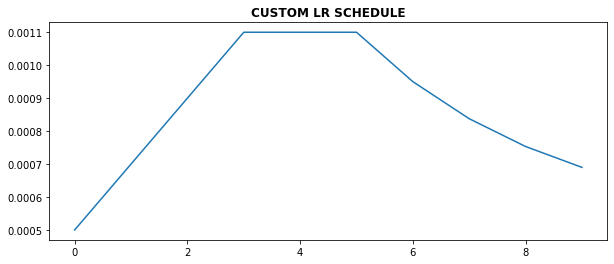

Learning rate schedule: 0.0005 to 0.0011 to 0.00069


In [8]:
### POTENTIAL LOSS FN ###
# def macro_double_soft_f1(y, y_hat):
#     """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
#     Use probability values instead of binary predictions.
#     This version uses the computation of soft-F1 for both positive and negative class for each label.
    
#     Args:
#         y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
#         y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
#     Returns:
#         cost (scalar Tensor): value of the cost function for the batch
#     """
#     y = tf.cast(y, tf.float32)
#     y_hat = tf.cast(y_hat, tf.float32)
#     tp = tf.reduce_sum(y_hat * y, axis=0)
#     fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
#     fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
#     tn = tf.reduce_sum((1 - y_hat) * (1 - y), axis=0)
#     soft_f1_class1 = 2*tp / (2*tp + fn + fp + 1e-16)
#     soft_f1_class0 = 2*tn / (2*tn + fn + fp + 1e-16)
#     cost_class1 = 1 - soft_f1_class1 # reduce 1 - soft-f1_class1 in order to increase soft-f1 on class 1
#     cost_class0 = 1 - soft_f1_class0 # reduce 1 - soft-f1_class0 in order to increase soft-f1 on class 0
#     cost = 0.5 * (cost_class1 + cost_class0) # take into account both class 1 and class 0
#     macro_cost = tf.reduce_mean(cost) # average on all labels
#     return macro_cost

### POTENTIAL LOSS FN ###
# def macro_soft_f1(y, y_hat):
#     """Compute the macro soft F1-score as a cost.
#     Average (1 - soft-F1) across all labels.
#     Use probability values instead of binary predictions.
    
#     Args:
#         y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
#         y_hat (float32 Tensor): probability matrix of shape (BATCH_SIZE, N_LABELS)
        
#     Returns:
#         cost (scalar Tensor): value of the cost function for the batch
#     """
    
#     y = tf.cast(y, tf.float32)
#     y_hat = tf.cast(y_hat, tf.float32)
#     tp = tf.reduce_sum(y_hat * y, axis=0)
#     fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
#     fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
#     soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
#     cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
#     macro_cost = tf.reduce_mean(cost) # average on all labels
    
#     return macro_cost

### POTENTIAL METRIC ###
# def macro_f1(y, y_hat, thresh=0.5):
#     """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
#     Args:
#         y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
#         y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
#         thresh: probability value above which we predict positive
        
#     Returns:
#         macro_f1 (scalar Tensor): value of macro F1 for the batch
#     """
#     y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
#     tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
#     fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
#     fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
#     f1 = 2*tp / (2*tp + fn + fp + 1e-16)
#     macro_f1 = tf.reduce_mean(f1)
#     return macro_f1


# Using an LR ramp up because fine-tuning a pre-trained model.
# Starting with a high LR would break the pre-trained weights.
N_EPOCHS=10
LR_START = 0.0005
LR_MAX = 0.0011
LR_MIN = 0.0005
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 2
LR_EXP_DECAY = 0.75

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

# VIEW SCHEDULE
rng = [i for i in range(N_EPOCHS)]
y = [lrfn(x) for x in rng]

plt.figure(figsize=(10,4))
plt.plot(rng, y)
plt.title("CUSTOM LR SCHEDULE", fontweight="bold")
plt.show()

print(f"Learning rate schedule: {y[0]:.3g} to {max(y):.3g} to {y[-1]:.3g}")

In [9]:
#PARAMS
MODEL_CKPT_DIR = "/kaggle/working/ebnet_b2_wdensehead"
DROP_YELLOW = True
NO_NEG_CLASS = False

if NO_NEG_CLASS:
    class_wts = {k:v for k,v in class_wts.items() if k!=18}
    class_cnts = {k:v for k,v in class_cnts.items() if k!=18}
    n_classes = 18
else:
    n_classes=19
    
BATCH_SIZE=32
OPTIMIZER = tf.keras.optimizers.Adam(lr=LR_START)
LOSS_FN = "binary_crossentropy"
SHUFF_BUFF = 500


# AUTO-CALCULATED
N_EX = len(RED_FILE_MAP[0])
N_VAL = int(VAL_FRAC*N_EX)
N_TRAIN = N_EX-N_VAL

if not os.path.isdir(MODEL_CKPT_DIR):
    os.makedirs(MODEL_CKPT_DIR, exist_ok=True)
    
print(f"{N_TRAIN:<7} TRAINING EXAMPLES")
print(f"{N_VAL:<7} VALIDATION EXAMPLES")

34662   TRAINING EXAMPLES
2810    VALIDATION EXAMPLES


<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.4 CREATE THE TRAINING AND VALIDATION DATASETS</h3>

---

WIP

In [10]:
# TRAIN DATASET
train_path_ds = tf.data.Dataset.zip(
    tuple([tf.data.Dataset.from_tensor_slices(input_ds) for input_ds in train_inputs])
)

# VALIDATION DATASET
val_path_ds = tf.data.Dataset.zip(
    tuple([tf.data.Dataset.from_tensor_slices(input_ds) for input_ds in val_inputs])
)

print(f"\n ... THERE ARE {N_EX} CELL TILES IN OUR FULL DATASET ... ")
print(f" ... THERE ARE {N_TRAIN} CELL TILES IN OUR TRAIN DATASET ... ")
print(f" ... THERE ARE {N_VAL} CELL TILES IN OUR VALIDATION DATASET ... \n")

print(train_path_ds)

for a,b,c,d,e in train_path_ds.take(1): 
    print(f"\tRed Path      --> {a}\n\t" \
          f"Green Path    --> {b}\n\t" \
          f"Blue Path     --> {c}\n\t" \
          f"Yellow Path   --> {d}\n\t" \
          f"Example Label --> {e} ({INT_2_STR[e.numpy()]})\n")


 ... THERE ARE 37472 CELL TILES IN OUR FULL DATASET ... 
 ... THERE ARE 34662 CELL TILES IN OUR TRAIN DATASET ... 
 ... THERE ARE 2810 CELL TILES IN OUR VALIDATION DATASET ... 

<ZipDataset shapes: ((), (), (), (), ()), types: (tf.string, tf.string, tf.string, tf.string, tf.int32)>
	Red Path      --> b'/kaggle/input/human-protein-atlas-red-cell-tile-dataset/red_mitochondria_256/data/train_tiles/mitochondria/dea6e9a6-bbbc-11e8-b2ba-ac1f6b6435d0_20_red.png'
	Green Path    --> b'/kaggle/input/human-protein-atlas-green-cell-tile-dataset/green_mitochondria_256/data/train_tiles/mitochondria/dea6e9a6-bbbc-11e8-b2ba-ac1f6b6435d0_20_green.png'
	Blue Path     --> b'/kaggle/input/human-protein-atlas-blue-cell-tile-dataset/blue_mitochondria_256/data/train_tiles/mitochondria/dea6e9a6-bbbc-11e8-b2ba-ac1f6b6435d0_20_blue.png'
	Yellow Path   --> b'/kaggle/input/human-protein-atlas-yellow-cell-tile-dataset/yellow_mitochondria_256/data/train_tiles/mitochondria/dea6e9a6-bbbc-11e8-b2ba-ac1f6b6435d0_20_ye

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.5 PREPROCESS THE DATASETS (COMBINE RGBY) AND ONE-HOT-ENCODE LABELS</h3>

---

We also augment, visualize, shuffle, batch, and prefetch.




In [11]:
def preprocess_path_ds(rp, gp, bp, yp, lbl, img_size=(224,224), combine=True, drop_yellow=True, no_neg=True):
    """ TBD """
    
    # Adjust class output expectation
    if no_neg:
        if lbl==18:
            lbl_arr = tf.zeros((18,), dtype=tf.uint8)
        else:
            lbl_arr = tf.one_hot(lbl, 18, dtype=tf.uint8)
    else:
        lbl_arr = tf.one_hot(lbl, 19, dtype=tf.uint8)
    
    ri = decode_img(tf.io.read_file(rp), img_size)
    gi = decode_img(tf.io.read_file(gp), img_size)
    bi = decode_img(tf.io.read_file(bp), img_size)

    if combine and drop_yellow:
        return tf.stack([ri[..., 0], gi[..., 0], bi[..., 0]], axis=-1), lbl_arr
    elif combine:
        yi = decode_img(tf.io.read_file(yp), img_size)
        return tf.stack([ri[..., 0], gi[..., 0], bi[..., 0], yi[..., 0]], axis=-1), lbl_arr
    elif drop_yellow:
        return ri, gi, bi, lbl_arr
    else:
        yi = decode_img(tf.io.read_file(yp), img_size)
        return ri, gi, bi, yi, lbl_arr
    

def augment(img_batch, lbl_batch):
    # SEEDING & KERNEL INIT
    K = tf.random.uniform((1,), minval=0, maxval=4, dtype=tf.dtypes.int32)[0]
    
    img_batch = tf.image.random_flip_left_right(img_batch)
    img_batch = tf.image.random_flip_up_down(img_batch)
    img_batch = tf.image.rot90(img_batch, K)
    
    img_batch = tf.image.random_saturation(img_batch, 0.85, 1.15)
    img_batch = tf.image.random_brightness(img_batch, 0.1)
    img_batch = tf.image.random_contrast(img_batch, 0.85, 1.15)
        
    # Can't figure this out right now
    #     # Apply a random crop
    #     img_batch = tf.where(K==0, tf.map_fn(
    #         fn=lambda img: tf.image.resize(tf.image.random_crop(tf.cast(img, tf.float32), (192,192,3)), (224,224)),
    #         elems=img_batch,), img_batch)

    return img_batch, lbl_batch


		... TRAIN EXAMPLES ...



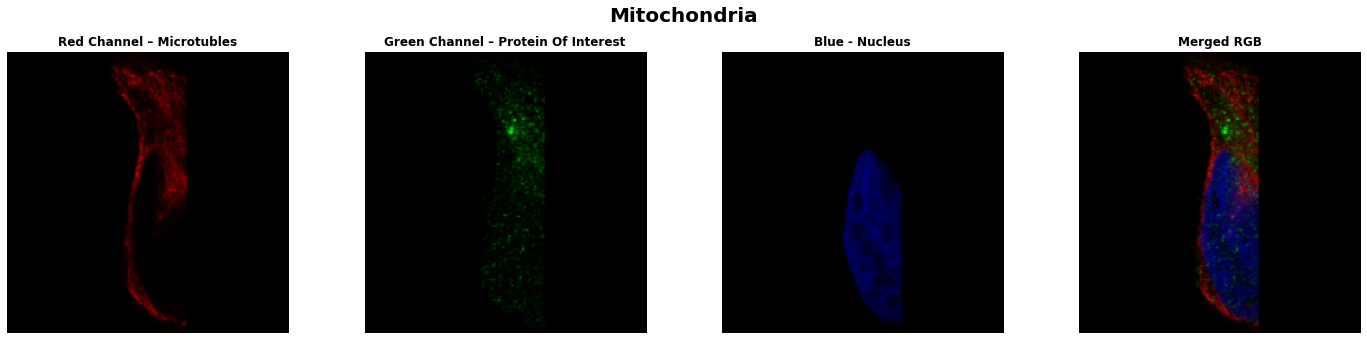

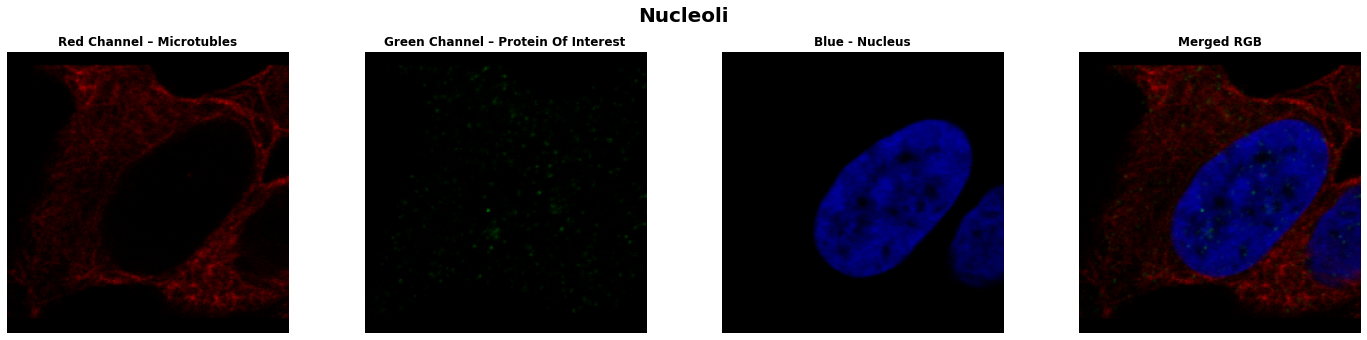

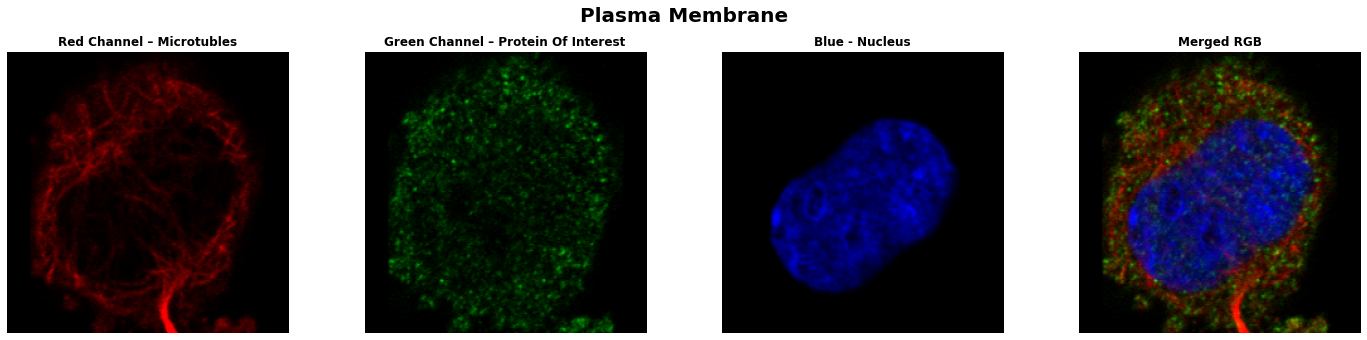


		... VAL EXAMPLES ...



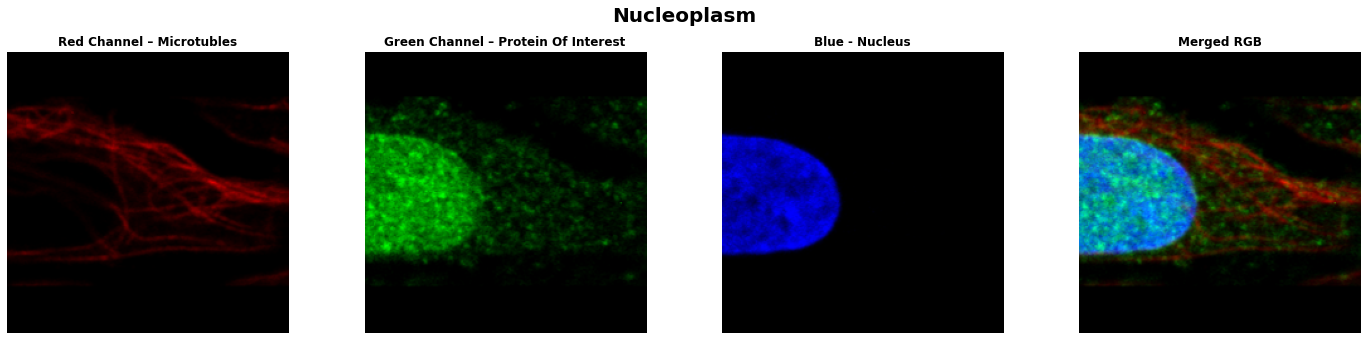

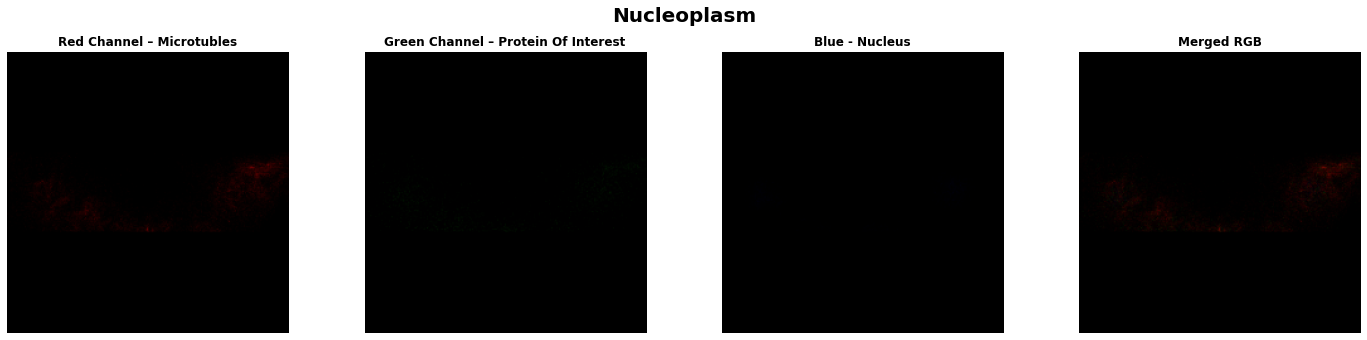

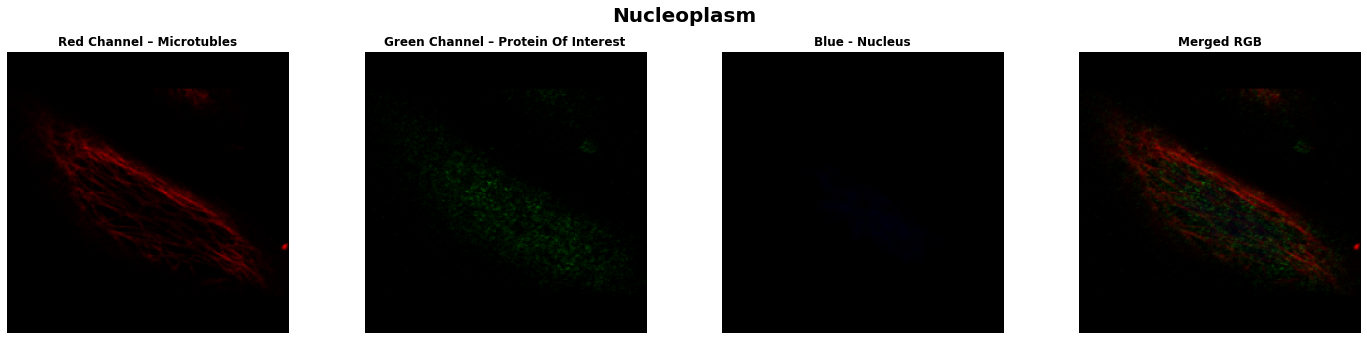


		... TRAIN EXAMPLES POST AUGMENTATION ...



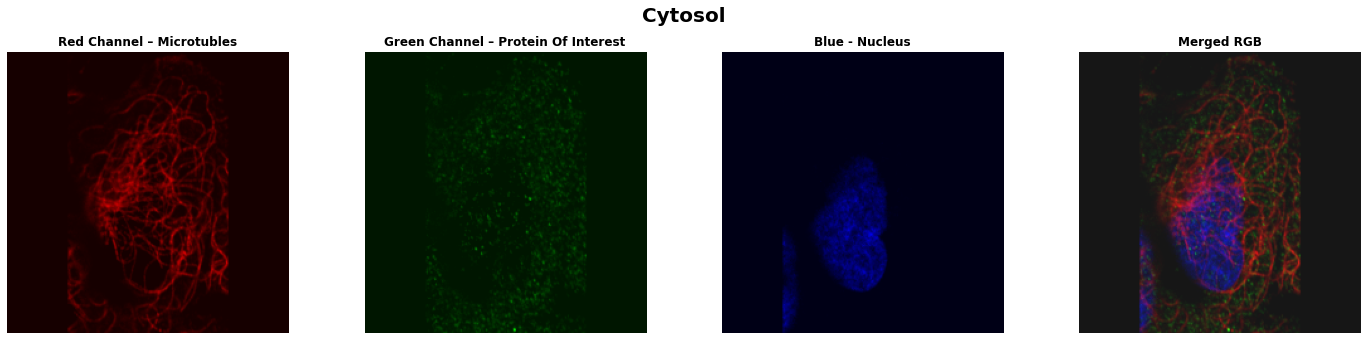

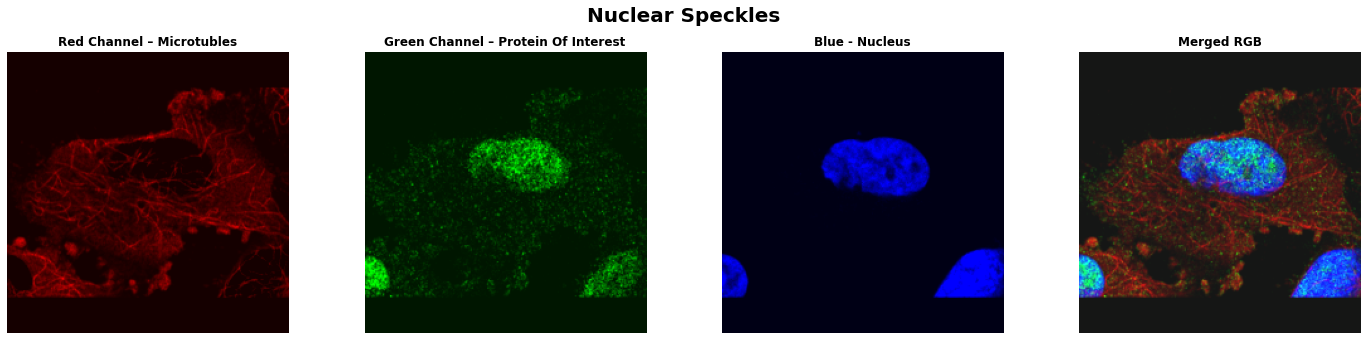

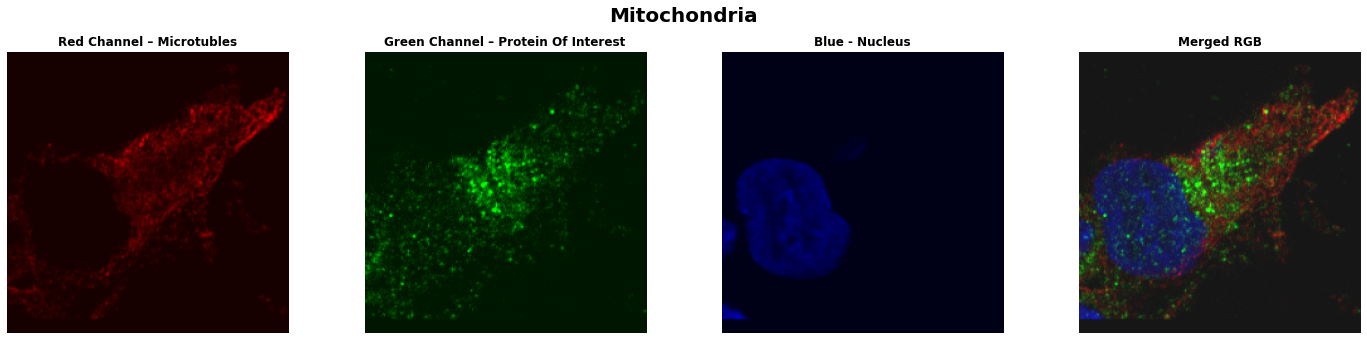

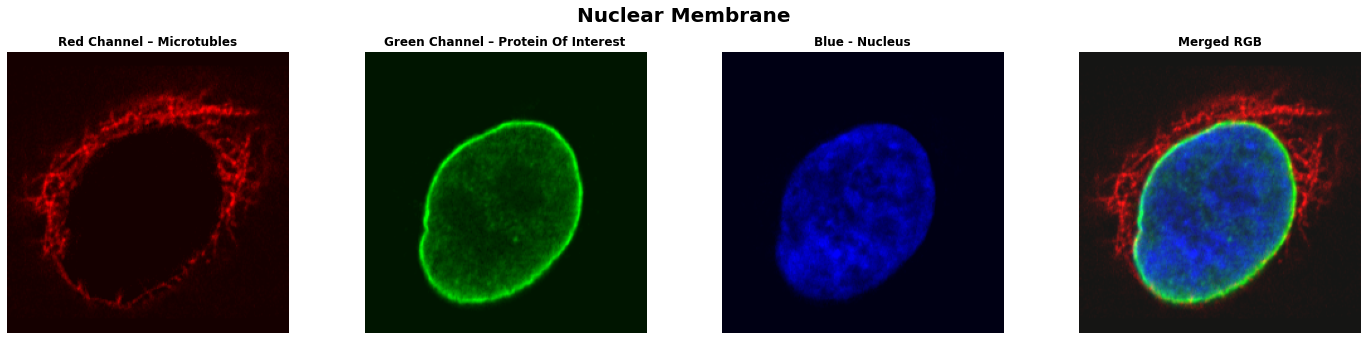

In [12]:
TRAIN_CACHE_DIR = "/kaggle/train_cache"
VAL_CACHE_DIR = "/kaggle/val_cache"

if not os.path.isdir(TRAIN_CACHE_DIR):
    os.makedirs(TRAIN_CACHE_DIR, exist_ok=True)
if not os.path.isdir(VAL_CACHE_DIR):
    os.makedirs(VAL_CACHE_DIR, exist_ok=True)

train_ds = train_path_ds.map(
    lambda r,g,b,y,l: preprocess_path_ds(r,g,b,y,l, drop_yellow=DROP_YELLOW, no_neg=NO_NEG_CLASS), 
    num_parallel_calls=tf.data.AUTOTUNE
)
val_ds = val_path_ds.map(
    lambda r,g,b,y,l: preprocess_path_ds(r,g,b,y,l, drop_yellow=DROP_YELLOW, no_neg=NO_NEG_CLASS), 
    num_parallel_calls=tf.data.AUTOTUNE
)

# VISUALIZE EXAMPLES
print("\n\t\t... TRAIN EXAMPLES ...\n")
for x,y in train_ds.take(3):
    if y.numpy().sum()==0:
        title_str = INT_2_STR[18]
    else:
        title_str = INT_2_STR[np.argmax(y.numpy())]
    plot_ex(x.numpy(), title=f"{title_str}", rgb_only=DROP_YELLOW)

print("\n\t\t... VAL EXAMPLES ...\n")
for x,y in val_ds.take(3):
    if y.numpy().sum()==0:
        title_str = INT_2_STR[18]
    else:
        title_str = INT_2_STR[np.argmax(y.numpy())]
    plot_ex(x.numpy(), title=f"{title_str}", rgb_only=DROP_YELLOW)
    
train_ds = train_ds.cache(TRAIN_CACHE_DIR) \
                   .shuffle(SHUFF_BUFF) \
                   .batch(BATCH_SIZE) \
                   .map(augment, num_parallel_calls=tf.data.AUTOTUNE) \
                   .prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.cache(VAL_CACHE_DIR) \
               .batch(BATCH_SIZE) \
               .prefetch(tf.data.AUTOTUNE)

# VISUALIZE EXAMPLES
print("\n\t\t... TRAIN EXAMPLES POST AUGMENTATION ...\n")
for xs,ys in train_ds.take(1):
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i==4:
            break
        if y.numpy().sum()==0:
            title_str = INT_2_STR[18]
        else:
            title_str = INT_2_STR[np.argmax(y.numpy())]
        plot_ex(x.numpy().astype(np.uint8), title=f"{title_str}", rgb_only=DROP_YELLOW)

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="modelling">5&nbsp;&nbsp;MODELLING&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

This section will explore how to acquire, augment and train the model

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.1 LOAD THE MODEL BACKBONE FOR TRAINING</h3>

---

WIP

In [13]:
# def get_backbone(efficientnet_name="efficientnet_b0", input_shape=(224,224,3), include_top=False, weights="imagenet", pooling="avg"):
#     if "b0" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB0(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b1" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB1(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b2" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB2(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b3" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB3(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b4" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB4(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b5" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB5(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b6" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB6(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     elif "b7" in efficientnet_name:
#         eb = tf.keras.applications.EfficientNetB7(
#             include_top=include_top, weights=weights, pooling=pooling, input_shape=input_shape
#             )
#     else:
#         raise ValueError("Invalid EfficientNet Name!!!")
#     return eb


# def add_head_to_bb(bb, n_classes=19, dropout=0.05, head_layer_nodes=(512,)):
#     x = tf.keras.layers.BatchNormalization()(bb.output)
#     x = tf.keras.layers.Dropout(dropout)(x)
    
#     for n_nodes in head_layer_nodes:
#         x = tf.keras.layers.Dense(n_nodes, activation="relu")(x)
#         x = tf.keras.layers.BatchNormalization()(x)
#         x = tf.keras.layers.Dropout(dropout/2)(x)
    
#     output = tf.keras.layers.Dense(n_classes, activation="sigmoid")(x)
#     return tf.keras.Model(inputs=bb.inputs, outputs=output)

# eb = get_backbone("b2")
# eb = add_head_to_bb(eb, n_classes, dropout=0.5)
# eb.compile(optimizer=OPTIMIZER, loss=LOSS_FN, metrics=["acc", tf.keras.metrics.AUC(name="auc", multi_label=True)])

# tf.keras.utils.plot_model(eb, show_shapes=True, show_dtype=True, dpi=55)

eb = tf.keras.models.load_model("../input/hpa-cellwise-classification-training/ebnet_b2_wdensehead/ckpt-0009-0.0801.ckpt")

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.2 FIT THE MODEL</h3>

---

WIP

In [14]:
history = eb.fit(
    train_ds, 
    validation_data=val_ds, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(MODEL_CKPT_DIR, "ckpt-{epoch:04d}-{val_loss:.4f}.ckpt"), verbose=1),
        tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
    ], 
    class_weight=class_wts, 
    epochs=N_EPOCHS
)
eb.save("./model_b2_224_w_densehead_classifier")

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005.
7177/7177 [==============================] - 4945s 686ms/step - loss: 0.0861 - acc: 0.6626 - auc: 0.9236 - val_loss: 0.0822 - val_acc: 0.7066 - val_auc: 0.0000e+00

Epoch 00001: saving model to /kaggle/working/ebnet_b2_wdensehead/ckpt-0001-0.0822.ckpt
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007.
7177/7177 [==============================] - 2372s 330ms/step - loss: 0.0814 - acc: 0.6821 - auc: 0.9345 - val_loss: 0.0805 - val_acc: 0.7115 - val_auc: 0.0000e+00

Epoch 00002: saving model to /kaggle/working/ebnet_b2_wdensehead/ckpt-0002-0.0805.ckpt
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009.
7177/7177 [==============================] - 2376s 331ms/step - loss: 0.0789 - acc: 0.6919 - auc: 0.9320 - val_loss: 0.0858 - val_acc: 0.6939 - val_auc: 0.0000e+00

Epoch 00003: saving model to /kaggle/working/ebnet_b2_wdensehead/ckpt-0003-0.0858.ckpt
E

<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">5.3 VISUALIZE TRAINING</h3>

---

WIP

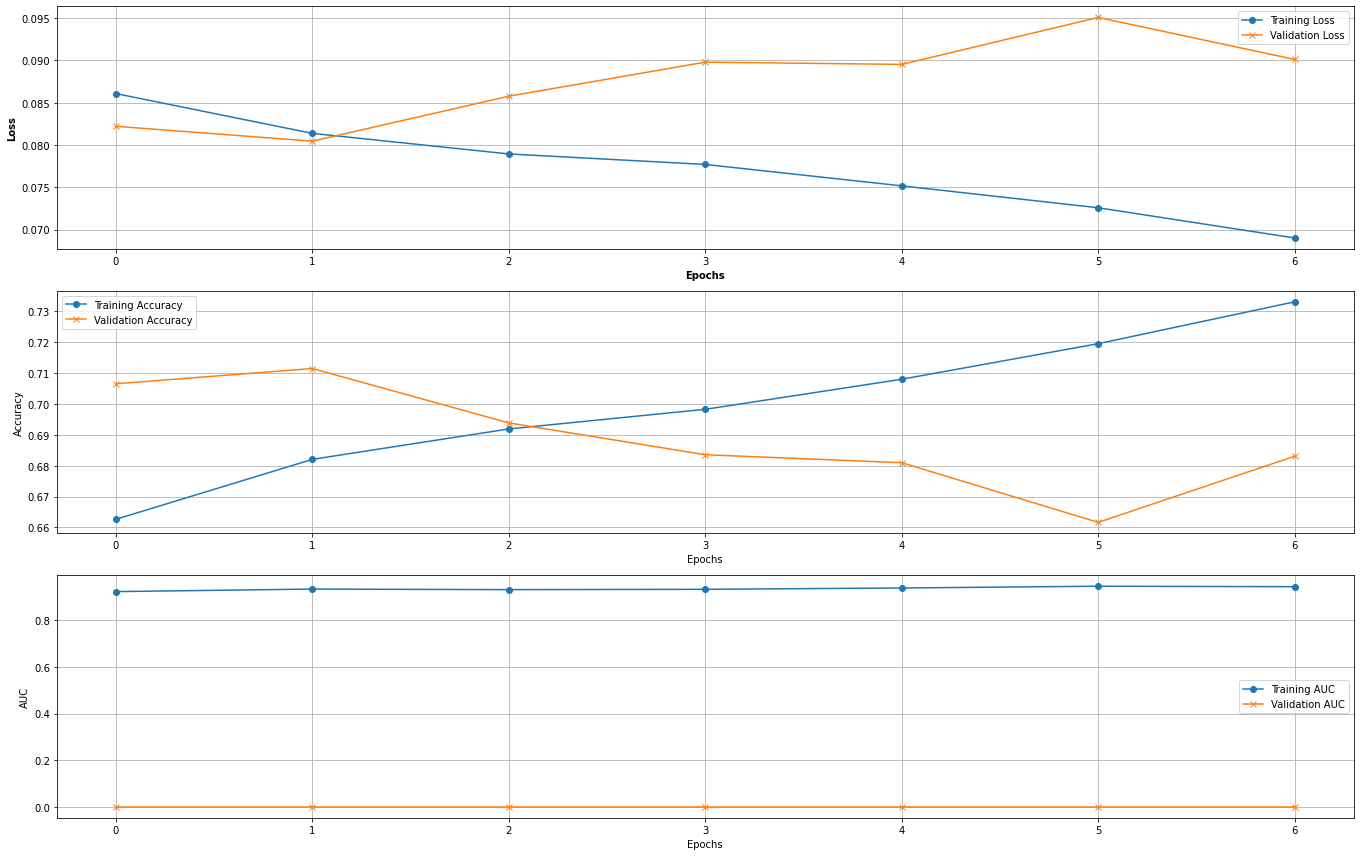

In [15]:
plt.figure(figsize = (19, 12))

plt.subplot(3,1,1)
plt.xlabel("Epochs", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.plot(history.history["loss"], label = "Training Loss" , marker='o')
plt.plot(history.history["val_loss"], label = "Validation Loss" , marker='x')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["acc"], label = "Training Accuracy" , marker='o')
plt.plot(history.history["val_acc"], label = "Validation Accuracy" , marker='x')
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.plot(history.history["auc"], label = "Training AUC" , marker='o')
plt.plot(history.history["val_auc"], label = "Validation AUC" , marker='x')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()